In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
file = pd.read_excel(r'../Data/Kolchicyna_prepared_data.xlsx')

In [3]:
file.head()

,Unnamed: 0,Publikacja DOI,Numer związku w publikacji,SMILES,Atywność [nM],A549,MCF-7,LoVo,LoVo/DX,BALB/3T3,A549_float,MCF-7_float,LoVo_float,LoVo/DX_float,BALB/3T3_float
0,0,https://doi.org/10.1016/j.bmcl.2021.128382,1,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,8","10,3","6,5","54,9","10,2",10.8,10.3,6.5,54.9,10.2
1,1,https://doi.org/10.1016/j.bmcl.2021.128382,2,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"11,6","12,0","8,5",31.1,14.3,11.6,12.0,8.5,31.1,14.3
2,2,https://doi.org/10.1016/j.bmcl.2021.128382,3,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"10,9","12,2","8,8","17,9","11,7",10.9,12.2,8.8,17.9,11.7
3,3,https://doi.org/10.1016/j.bmcl.2021.128382,4,CC(C)CN[C@H]2CCc3cc(OC)c(OC)c(OC)c3C1=CC=C(SC)...,Atywność [nM],"10,5","11,3","8,5","10,2","11,0",10.5,11.3,8.5,10.2,11.0
4,4,https://doi.org/10.1016/j.bmcl.2021.128382,5,COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC...,Atywność [nM],"89,5","92,7","52,8","77,8","99,4",89.5,92.7,52.8,77.8,99.4


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
rdDepictor.SetPreferCoordGen(True)
#IPythonConsole.drawOptions.minFontSize=20
def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2]) #, useSVG=True



In [5]:
mol1 = Chem.MolFromSmiles(file['SMILES'][0])
mol2 = Chem.MolFromSmiles('C1Cc2ccccc2C2=CC=CCC=C2C1')

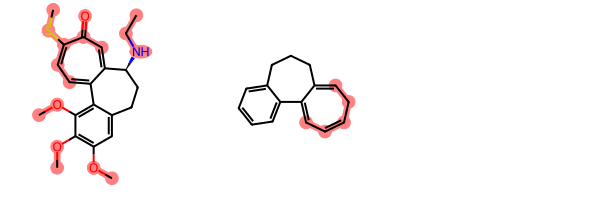

In [6]:
view_difference(mol1,mol2)

In [7]:
l_mn = list(range(len(file['SMILES'])))
mol1 = Chem.MolFromSmiles('C1Cc2ccccc2C2=CC=CCC=C2C1')
for i in range(len(file['SMILES'])):
    mol = Chem.MolFromSmiles(file['SMILES'][i])
    l_mn[i] = view_difference(mol1, mol)

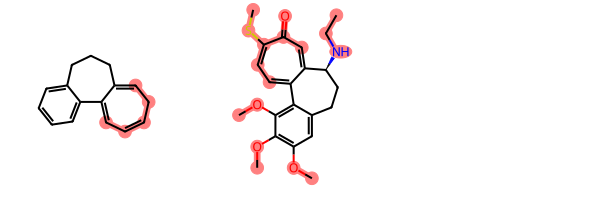

In [8]:
l_mn[0]

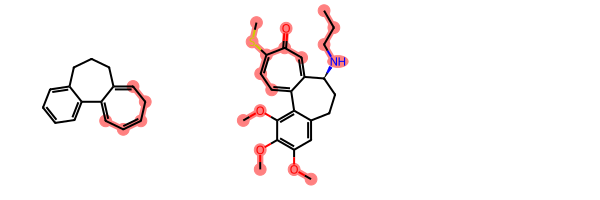

In [9]:
l_mn[1]

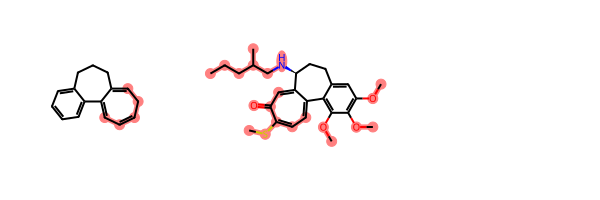

In [10]:
l_mn[7]

In [11]:
m = Chem.MolFromSmiles(file['SMILES'][0])
substructure = Chem.MolFromSmarts('CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC')
print(m.GetSubstructMatch(substructure)) #GetSubstructMatch #GetSubstructMatches

()


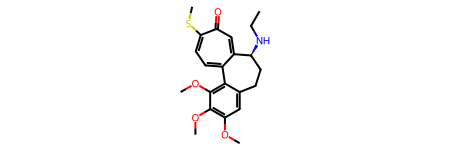

In [12]:
m

In [13]:
file['SMILES'][0]

'COc2c3C1=CC=C(SC)C(=O)C=C1[C@H](CCc3cc(OC)c2OC)NCC'

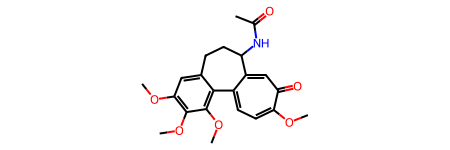

In [14]:
Chem.MolFromSmiles('CC(=O)NC1CCC2=CC(=C(C(=C2C3=CC=C(C(=O)C=C13)OC)OC)OC)OC')

In [15]:
# draw structure and get SMILES -> only of the core
interesting_smiles = 'C1Cc2ccccc2C2=CC=CCC=C2C1' #'C1CC2=CCC=CC=C2C3=CC=CC=C3C1' # OLD'C1CC2=C(C=CC=C2)C2=CC=CCC=C2C1' #C1CC2=CCC=CC=C2C3=CC=CC=C3C1

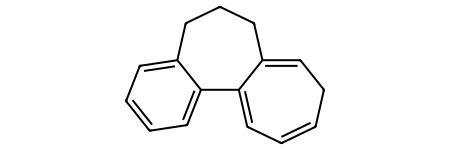

In [16]:
Chem.MolFromSmiles(interesting_smiles)

In [17]:
m = Chem.MolFromSmiles(file['SMILES'][0])
substructure = Chem.MolFromSmarts(interesting_smiles)
print(m.GetSubstructMatch(substructure))

()


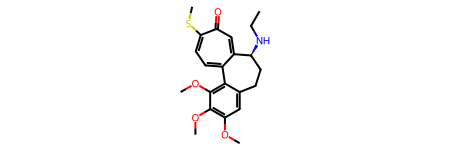

In [18]:
m

In [19]:
ne_att = 'CC\C(C)=C/C(=C)C=C'

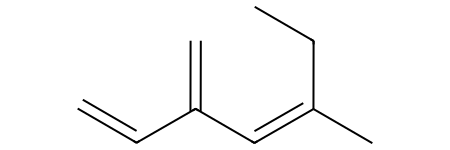

In [20]:
Chem.MolFromSmiles(ne_att)

In [21]:
bnm = Chem.MolToSmiles(Chem.MolFromSmiles(file['SMILES'][0]), canonical=True, isomericSmiles=False)
m = Chem.MolFromSmiles(bnm)
substructure = Chem.MolFromSmarts('c1ccccc1')
substructure2 = Chem.MolFromSmarts('CCC')
print(m.GetSubstructMatches(substructure))
#print(m)
#print(m.GetSubstructMatches(substructure2))

((6, 7, 8, 11, 14, 17),)


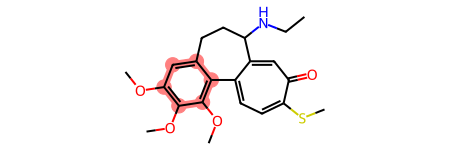

In [22]:
m

In [23]:
bnm

'CCNC1CCc2cc(OC)c(OC)c(OC)c2-c2ccc(SC)c(=O)cc21'

In [24]:
bnmo = 'C1Cc2ccccc2C2=CC=CCC=C2C1'
bnmo = Chem.MolToSmiles(Chem.MolFromSmiles(bnmo), canonical=True, isomericSmiles=False)

In [25]:
m = Chem.MolFromSmiles(bnm)
substructure = Chem.MolFromSmarts(bnmo)
print(m.GetSubstructMatch(substructure))

()


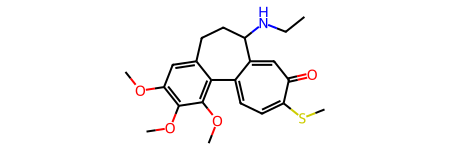

In [26]:
m

In [27]:
all_mols = [Chem.MolFromSmiles(smi) for smi in file['SMILES']]

In [28]:
my_svg = Draw.MolsToGridImage(all_mols,legends=[str("Molecule number: "+str(x+1)) for x in range(len(all_mols))],
                              maxMols=int(len(all_mols)), molsPerRow=5, useSVG = True, subImgSize=(300,300))
my_svg

In [29]:
#with open('initial_colchicine.svg','wb+') as outfile:
   # outfile.write(my_svg.data.encode('utf-8'))

In [30]:
## create the charset and other stuff.... check this and try to train the model...

## Tanimoto similarity between...

In [31]:
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
import matplotlib.pyplot as plt

In [32]:
def prepare_fingerprints(smi_1, smi_list2):
    mol_l1 = Chem.MolFromSmiles(smi_1)
    mol_l2 = [Chem.MolFromSmiles(smi) for smi in smi_list2]
    
    fingerprint_list1 = Chem.RDKFingerprint(mol_l1)
    
    fingerprint_list2 = [Chem.RDKFingerprint(mol) for mol in mol_l2]
    
    return fingerprint_list1, fingerprint_list2

In [33]:
def calculate_similarity(finger, finger_list):
    
    similarity = []
    for sim in finger_list:
        similarity.append(TanimotoSimilarity(sim, finger))
        
    return similarity

In [34]:
nea = prepare_fingerprints(interesting_smiles, file['SMILES'])

In [35]:
simi = calculate_similarity(nea[0], nea[1])

In [36]:
final_df = pd.DataFrame(columns=['test'])
final_df['Similarity'] = 0
final_df['Similarity'] = simi

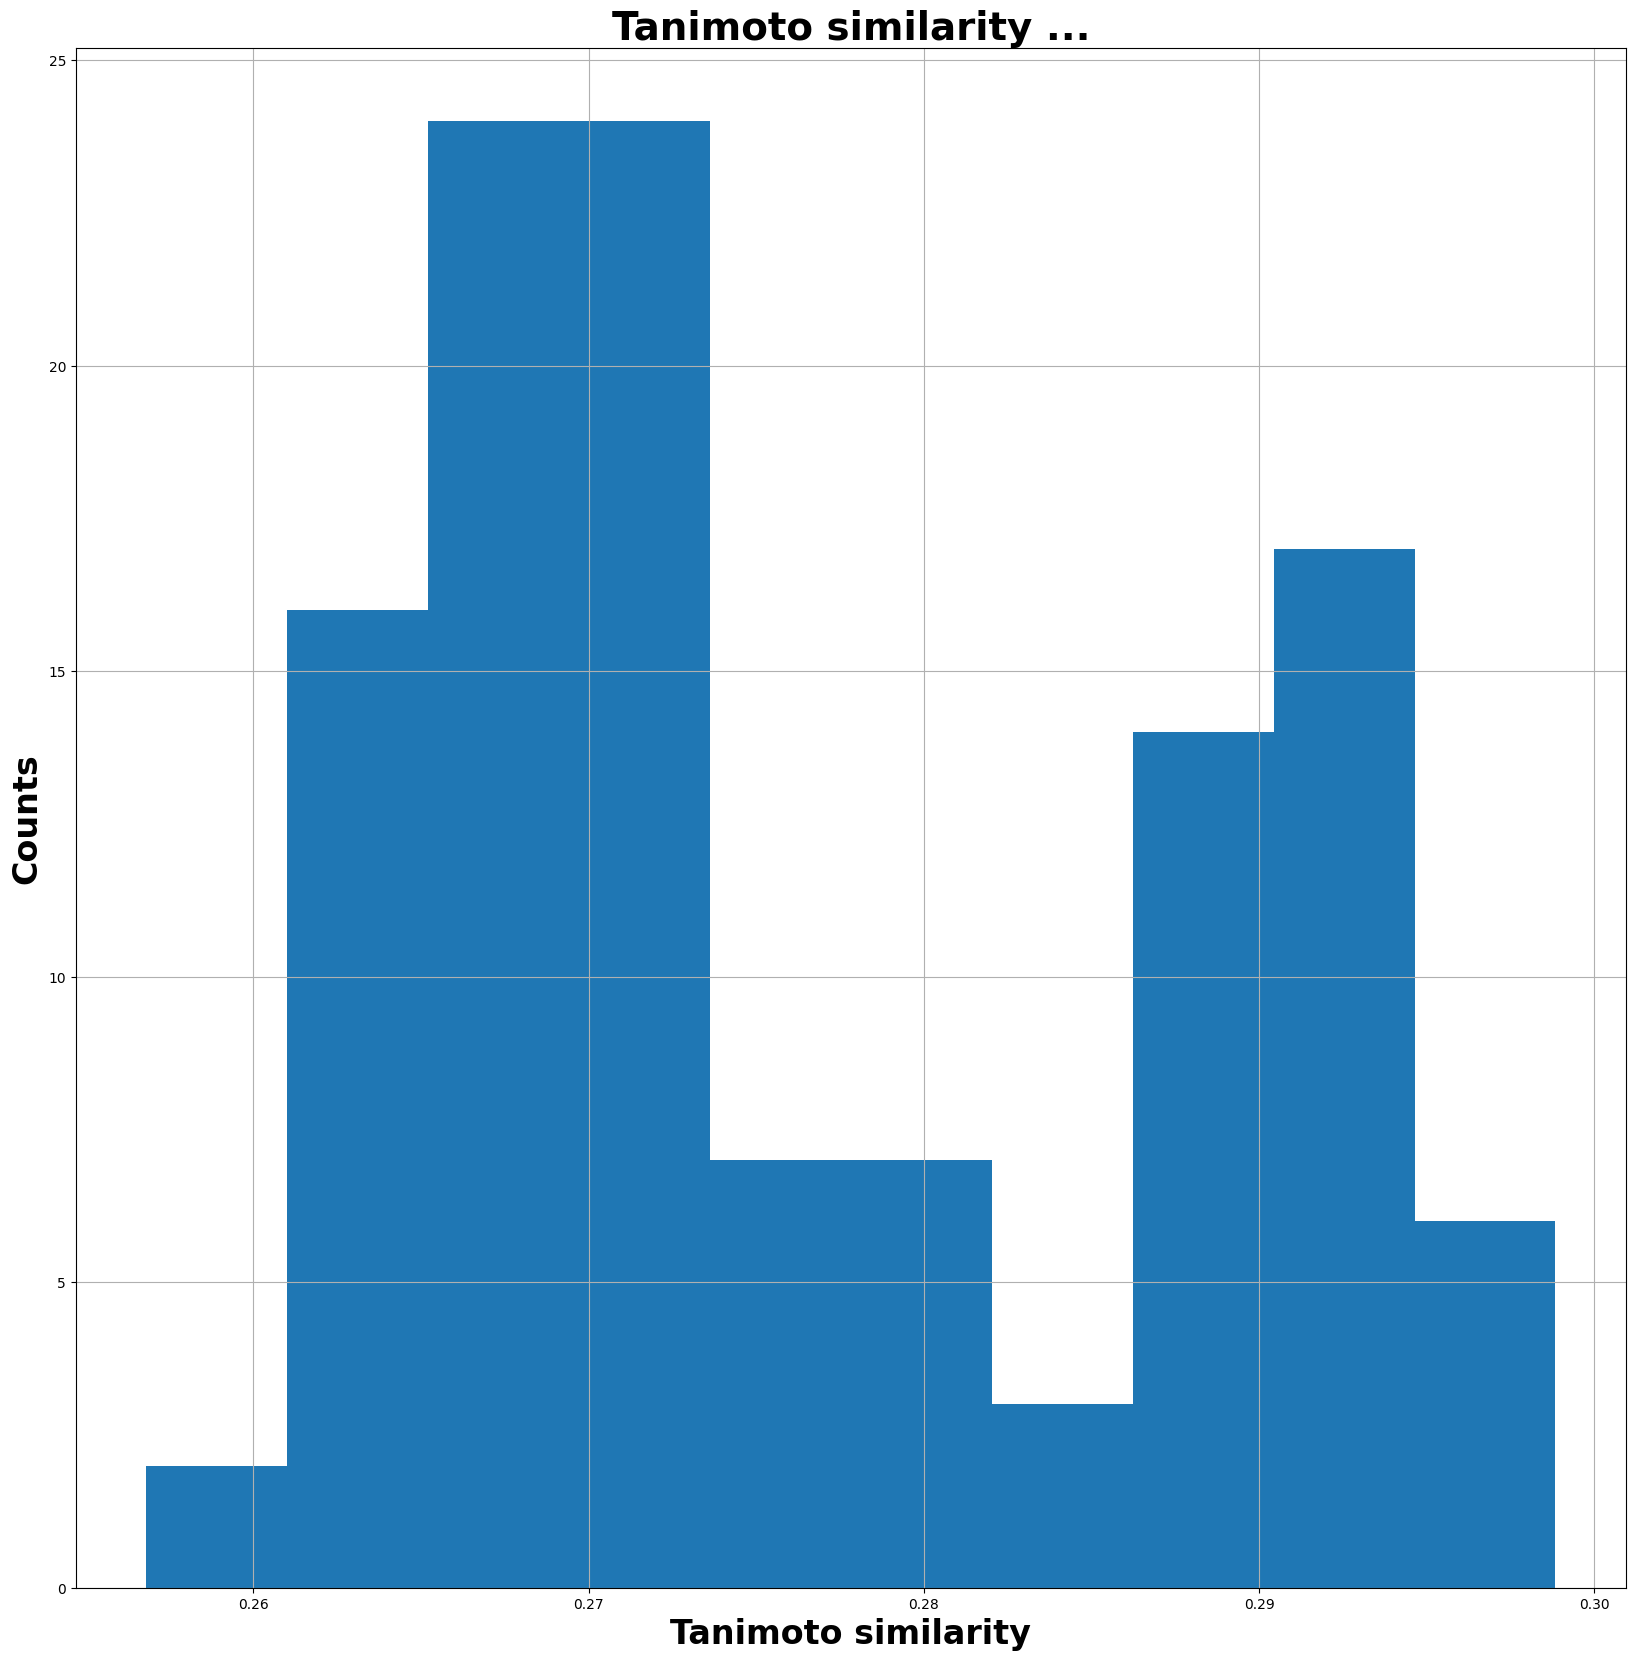

In [37]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

plt.hist(final_df['Similarity'], bins=10)
plt.title('Tanimoto similarity ...', fontweight='bold', fontsize=28)
plt.xlabel('Tanimoto similarity', fontweight='bold', fontsize=24)
plt.ylabel('Counts', fontweight='bold', fontsize=24)
plt.rc('grid', linestyle="-.", color='black')
plt.grid(True)
plt.show()

In [38]:
min(final_df['Similarity'])

0.2568064753495217